In [1]:





























#보스턴 주택가격 데이터셋 로딩을 위한 패키지
#sklearn(사이킷런)
from sklearn.datasets import load_boston
#보스턴 주택가격 데이터셋 로딩
boston = load_boston()
#데이터셋의 형태
print(boston.data.shape)
print(type(boston.data))
print(boston.data[:3])


(506, 13)
<class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


In [2]:
#데이터셋에 대한 설명
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

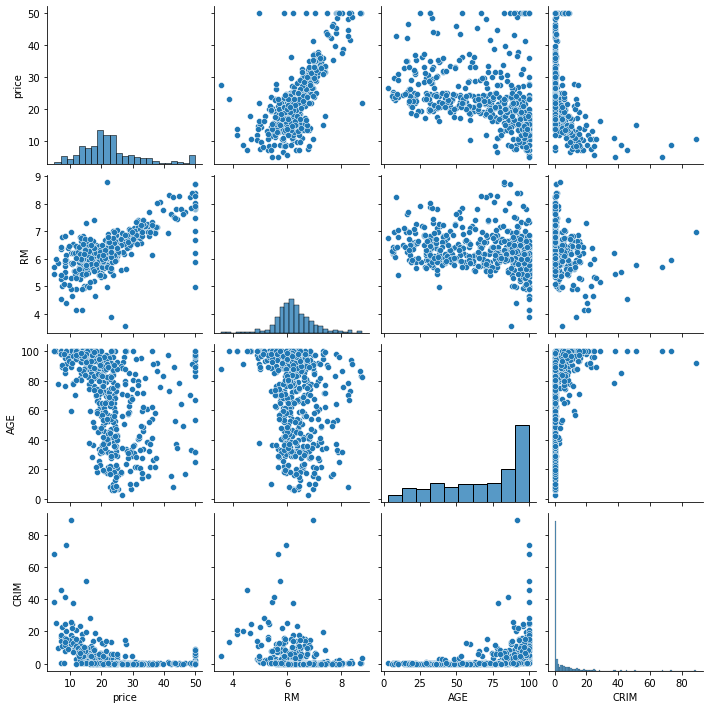

In [4]:
# 회귀분석: 단답형
# 분류: 선택형
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(boston.data,
columns=boston.feature_names)
df["price"] = boston.target # 주택가격
# 산점도 행렬 (RM 방의 갯수, AGE 노후화, CRIM 범죄율)
sns.pairplot(df[["price", "RM", "AGE", "CRIM"]])
plt.show()

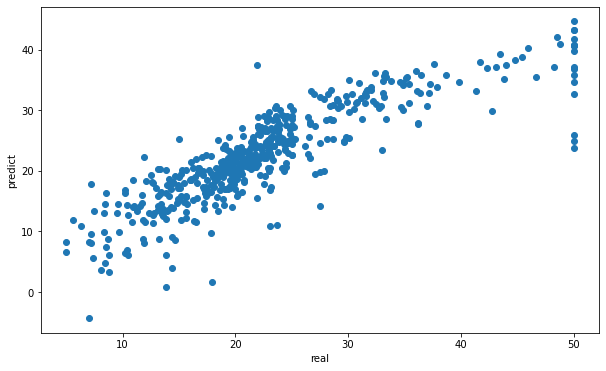

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(boston.data, boston.target)
predicted = model.predict(boston.data)
plt.figure(figsize=(10,6))
plt.scatter(boston.target, predicted)
plt.xlabel("real")
plt.ylabel("predict")
plt.show()

In [6]:
#13개의 필드, 특성끼리 곱하여 데이터 확장
# 범죄율, 고속도로 접근성 => 범죄율과 고속도로 접근성의 곱도 계산
#13개의 특성을 확장하여 91개의 특성을 더하여 총 104개
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([X, y], axis=1) #가로 방향 연결
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [9]:
from sklearn.model_selection import train_test_split
# 데이터셋을 나눔 (학습용 : 검증용 = 7 : 3)
#random_state : 난수 발생을 위한 seed의 인자값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_train, y_train)

In [11]:
print("학습용 :",model.score(X_train, y_train))
print("학습용 :",model.score(X_test, y_test)) 

학습용 : 0.7495400632086622
학습용 : 0.6996255772983122


In [12]:
#상관계수
coef=model.coef_
#절편
intercept=model.intercept_
print(coef)
print(intercept)
# 범죄율이 한단위 증가하면 집값은 약 153달러 하락한다
# 찰스강의 경계에 위치한 경우 집값은 약 1622달러 상승한다
# 방갯수가 한단위 증가하면 집값은 약 3352달러 상승한다
# 재산세율이 한단위 증가하면 집값은 약 1223 하락한다

[[-1.53776087e-01  6.50159270e-02 -2.42597326e-02  1.62203309e+00
  -1.52999306e+01  3.35196668e+00  1.13259963e-02 -1.54810871e+00
   3.02641886e-01 -1.22317535e-02 -8.11539044e-01  1.29504798e-02
  -5.44861583e-01]]
[34.24483703]


c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-

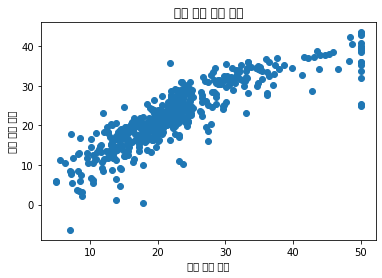

In [14]:
pred = model.predict(boston.data)
plt.scatter(boston.target, pred)
plt.xlabel(" 실제 주택 가격 ")
plt.ylabel(" 예측 주택 가격 ")
plt.title(" 주택 가격 예측 비교 ")
plt.show()

Text(0, 0.5, ' 주택가격 ')

c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-

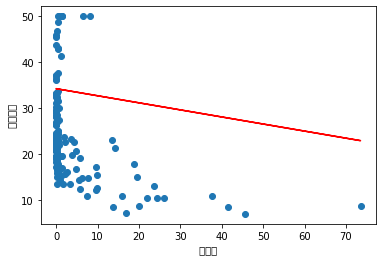

In [15]:
#산점도 그리기
plt.scatter(X_test["CRIM"],y_test)
#회귀선 그리기
plt.plot(X_test["CRIM"], coef[0][0]*X_test["CRIM"] +intercept, c="red")
plt.xlabel(" 범죄율 ") 
plt.ylabel(" 주택가격 ")

In [ ]:
#산점도 그리기
plt.scatter(X_test["NOX"],y_test)
#회귀선 그리기
plt.plot(X_test["NOX"], coef[0][4]*X_test["NOX"] +intercept, c="red")
plt.xlabel(" 일산화질소 농도 ") 
plt.ylabel(" 주택가격 ")

Text(0, 0.5, ' 주택가격 ')

c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-

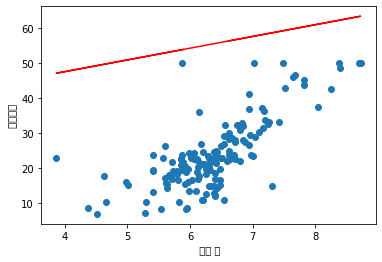

In [16]:
#산점도 그리기
plt.scatter(X_test["RM"],y_test)
#회귀선 그리기
plt.plot(X_test["RM"], coef[0][5]*X_test["RM"] +intercept,
c="red")
plt.xlabel("  방의 수 ")
plt.ylabel(" 주택가격 ")

In [18]:
import pandas as pd
import statsmodels.api as sm
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(" 회귀계수\n",result_boston2.params) 
print("R-squared\n",result_boston2.rsquared) #회귀모델의 설명력 95.8%의 설명력 
print("P values\n",result_boston2.pvalues)
#요약 결과 출력
print(result_boston2.summary())

 회귀계수
 CRIM      -0.092897
ZN         0.048715
INDUS     -0.004060
CHAS       2.853999
NOX       -2.868436
RM         5.928148
AGE       -0.007269
DIS       -0.968514
RAD        0.171151
TAX       -0.009396
PTRATIO   -0.392191
B          0.014906
LSTAT     -0.416304
dtype: float64
R-squared
 0.9591890143535311
P values
 CRIM       7.197130e-03
ZN         7.762640e-04
INDUS      9.497886e-01
CHAS       1.689461e-03
NOX        3.935067e-01
RM         1.179476e-61
AGE        5.989795e-01
DIS        1.016889e-06
RAD        1.064354e-02
TAX        1.698772e-02
PTRATIO    3.925055e-04
B          5.266943e-08
LSTAT      2.142519e-15
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3

In [19]:
#변수들의 상관관계
#상관계수 행렬
dfX.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


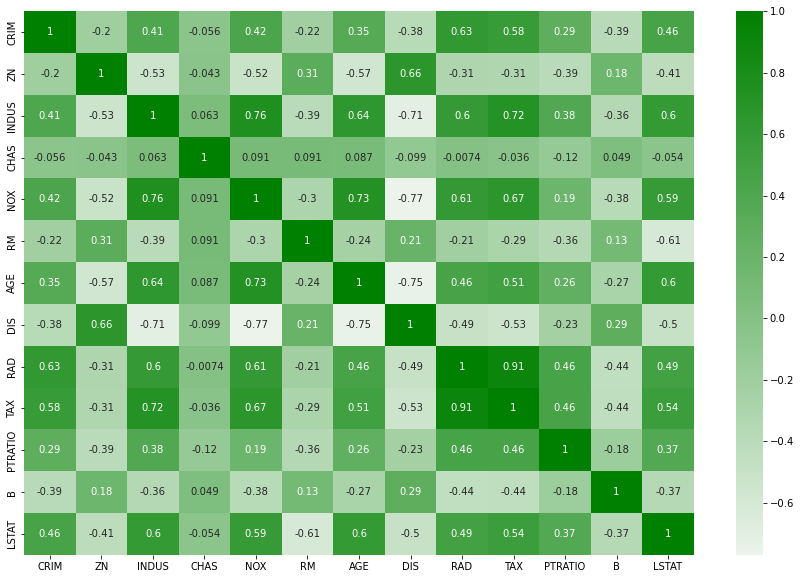

In [20]:
import seaborn as sns
plt.figure(figsize=(15,10))
cmap = sns.light_palette("green", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)
plt.show()
# 색이 진할수록 상관관계 높음

In [21]:
# 다중공선성은 VIF값으로 확인할 수 있다
# 다른 변수에 의존적일수록 VIF가 커진다 (다중공선성)
#독립변수가 서로 의존하게 되면 과적합화 문제가 발생하여 모델의 안정성이 떨어질 수 있다.
# VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(
dfX.values, i) for i in range(dfX.shape[1])]
vif[" 변수 "] = dfX.columns 
vif = vif.sort_values("VIF").reset_index(drop=True)
vif
#vif 값은 작을수록 좋은데 5보다 큰 값은 다중공선성이 큰 변수라고 볼 수 있다.

,VIF,변수
0,1.152952,CHAS
1,2.100373,CRIM
2,2.844013,ZN
3,11.102025,LSTAT
4,14.485758,INDUS
5,14.699652,DIS
6,15.167725,RAD
7,20.104943,B
8,21.386850,AGE
9,61.227274,TAX


In [22]:
# INDUS 필드 제거
arr=boston.data[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
arr
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS',
'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()
print(" 회귀계수\n",result_boston3.params)
print("R-squared\n",result_boston3.rsquared) #회귀모델의 설명력 95.8%의 설명력
print("P values\n",result_boston3.pvalues)
#요약 결과 출력
print(result_boston3.summary())

 회귀계수
 CRIM      -0.092808
ZN         0.048813
CHAS       2.848208
NOX       -2.927475
RM         5.931793
AGE       -0.007274
DIS       -0.965462
RAD        0.172304
TAX       -0.009504
PTRATIO   -0.393025
B          0.014914
LSTAT     -0.416504
dtype: float64
R-squared
 0.9591886857507301
P values
 CRIM       7.145593e-03
ZN         6.970046e-04
CHAS       1.615787e-03
NOX        3.640270e-01
RM         1.728076e-63
AGE        5.983475e-01
DIS        4.876021e-07
RAD        7.456777e-03
TAX        7.315910e-03
PTRATIO    3.411125e-04
B          4.819839e-08
LSTAT      1.735166e-15
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.5
Date:                Mon, 23 May 2022   Pro

In [23]:
# NOX 필드 제거
arr=boston.data[:,[0,1,3,5,7,8,9,10,11,12]]
arr
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS',
'RM', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()
print(" 회귀계수\n",result_boston3.params) 
print("R-squared\n",result_boston3.rsquared) #회귀모델의 설명력 95.8%의 설명력
print("P values\n",result_boston3.pvalues)
#요약 결과 출력
print(result_boston3.summary())

 회귀계수
 CRIM      -0.091081
ZN         0.051292
CHAS       2.718498
RM         5.714502
DIS       -0.866551
RAD        0.182790
TAX       -0.010896
PTRATIO   -0.400242
B          0.014532
LSTAT     -0.449224
dtype: float64
R-squared
 0.9590665393503892
P values
 CRIM       8.185236e-03
ZN         3.086919e-04
CHAS       2.415760e-03
RM         5.457365e-82
DIS        3.117713e-07
RAD        4.175079e-03
TAX        1.051013e-03
PTRATIO    2.577209e-04
B          8.276880e-08
LSTAT      1.047574e-23
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Mon, 23 May 2022   Prob (F-statistic):                        0.00
Time:                        10:28:39   Log

In [24]:
# PTRATIO 필드를 제거하니 오히려 설명력이 95.7%로 약간 떨어지므로
# PTRATIO 필드부터는 제거하지 않는다
arr=boston.data[:,[0,1,3,5,7,8,9,11,12]]
arr
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS',
'RM', 'DIS', 'RAD','TAX', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()
print(" 회귀계수\n",result_boston3.params) 
print("R-squared\n",result_boston3.rsquared) #회귀모델의 설명력 95.7%의 설명력 
print("P values\n",result_boston3.pvalues)
#요약 결과 출력
print(result_boston3.summary())

 회귀계수
 CRIM    -0.093019
ZN       0.072284
CHAS     2.980292
RM       5.164429
DIS     -1.124666
RAD      0.186820
TAX     -0.014447
B        0.011811
LSTAT   -0.511810
dtype: float64
R-squared
 0.9579482696065791
P values
 CRIM     7.645825e-03
ZN       5.230084e-08
CHAS     9.932030e-04
RM       2.146638e-96
DIS      9.697344e-13
RAD      3.831347e-03
TAX      8.010777e-06
B        6.871124e-06
LSTAT    2.127561e-33
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1258.
Date:                Mon, 23 May 2022   Prob (F-statistic):                        0.00
Time:                        10:29:55   Log-Likelihood:                         -1531.4
No. Observations:                 5

In [26]:
from statsmodels.datasets.longley import load_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#미국의 거시경제지표 데이터셋
# TOTEMP - Total Employment
# GNPDEFL - GNP deflator
# GNP - GNP
# UNEMP - Number of unemployed
# ARMED - Size of armed forces
# POP - Population
# YEAR - Year (1947 - 1962)
dfy = load_pandas().endog
dfX = load_pandas().exog
df = pd.concat([dfy, dfX], axis=1)
df.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


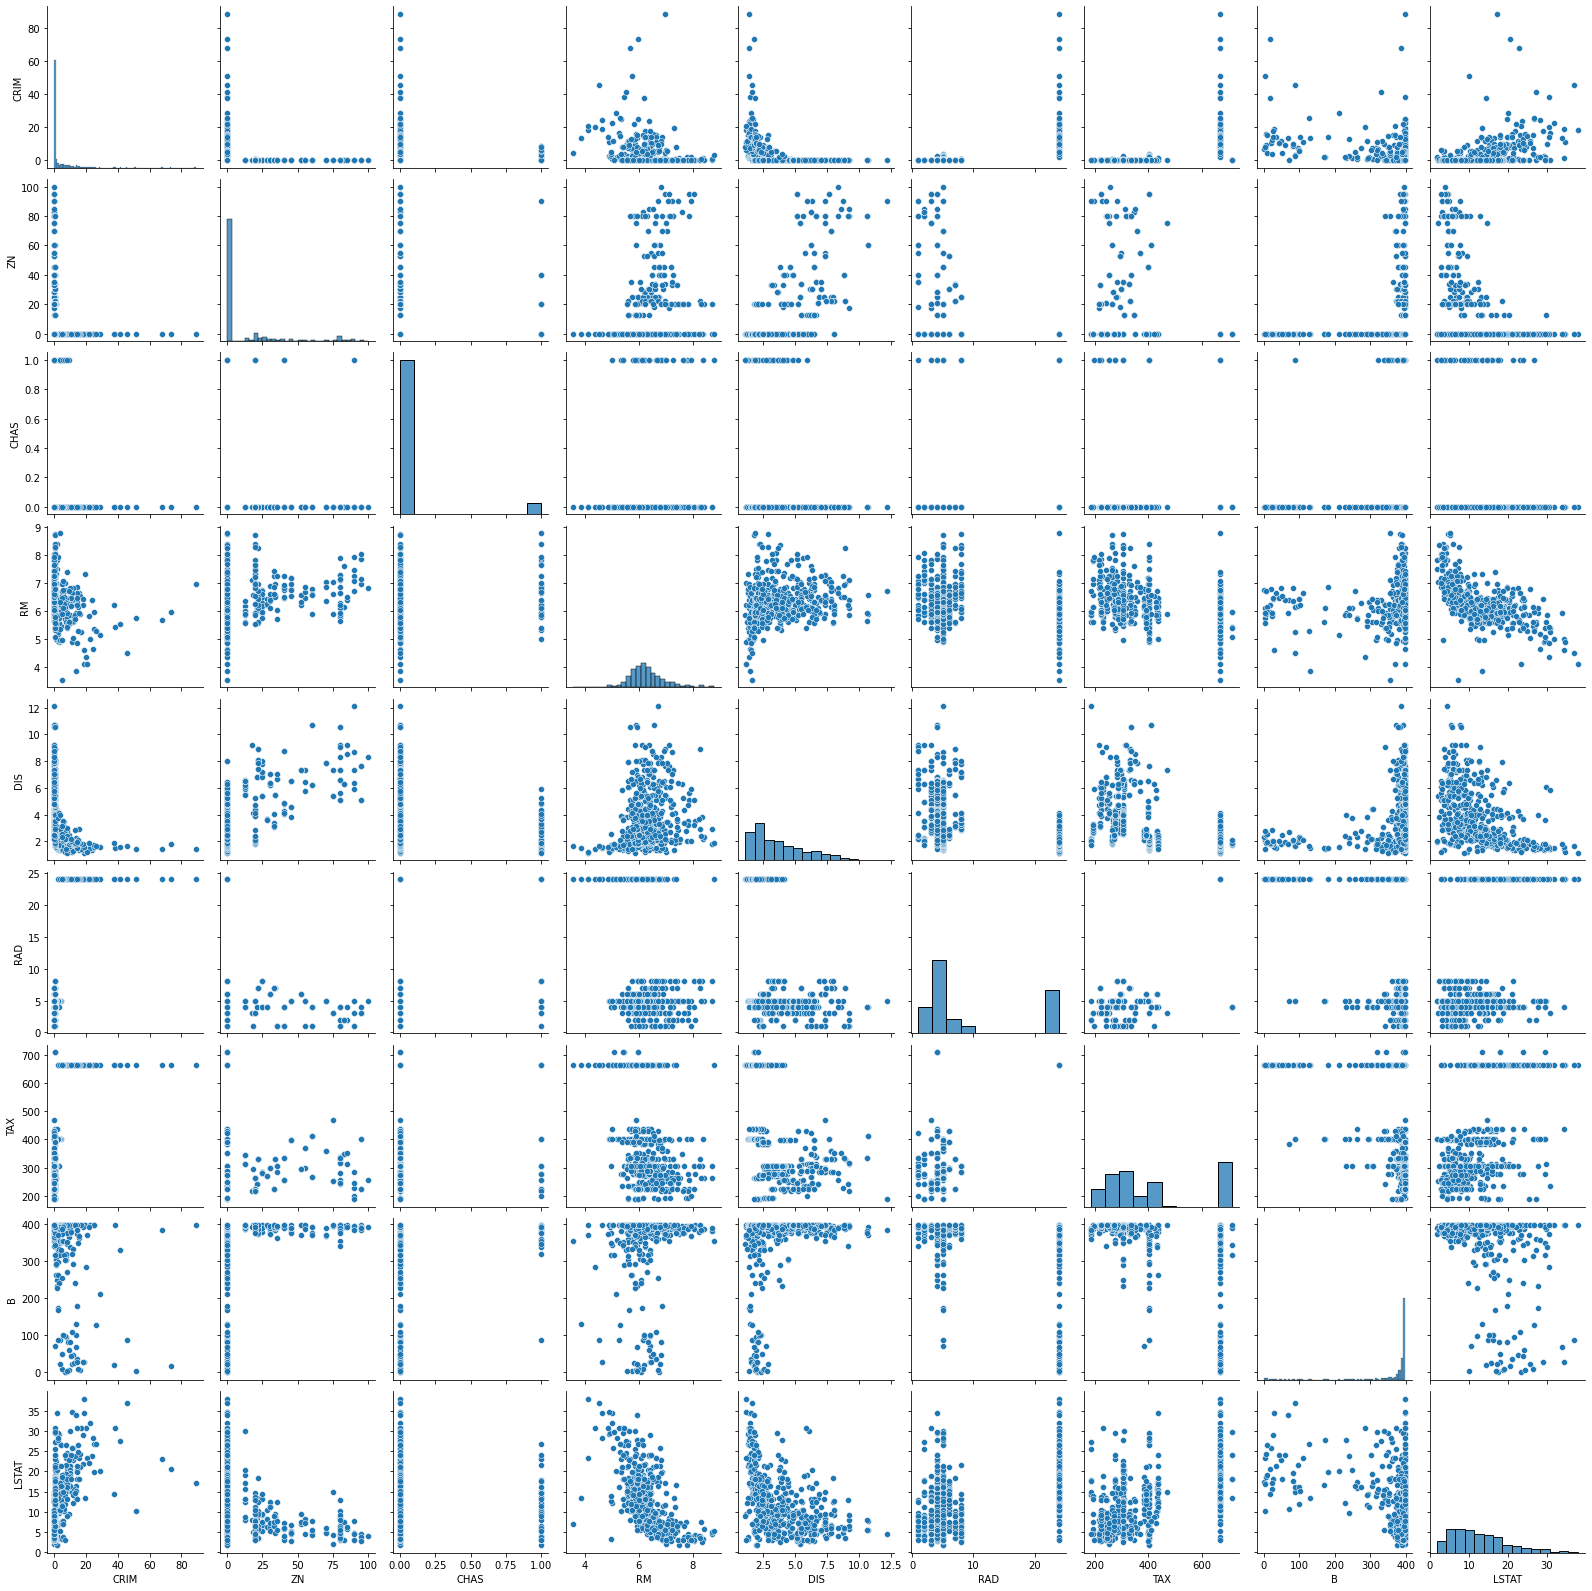

In [25]:
sns.pairplot(dfX)
plt.show()
# 독립변수들간의 상관관계가 강한 데이터셋

In [27]:
dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


<AxesSubplot:>

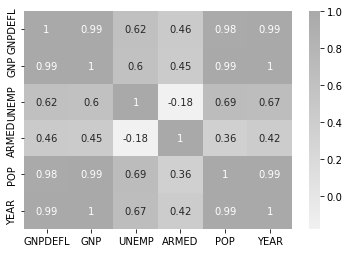

In [28]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)

In [29]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5,
random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ GNPDEFL + POP + GNP + YEAR + ARMED + UNEMP", data=df_train)
    return df_train, df_test, model.fit()
df_train, df_test, result1 = get_model1(3)
result1.summary()
# (conditional number) 다중공선성 문제로 인하여 조건수 가 증가한다.

c:\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Mon, 23 May 2022   Prob (F-statistic):             0.0366
Time:                        10:35:39   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.150      -5e+07    2.53e+07
GNPDEFL      106.2620     75.709      1.404      0.394    -855.708    1068.232
POP            2.2959      0.725      3.167      0.195      -6.915      11.506
GNP           -0.3997      0.120     -3.339      0.185      -1.920       1.121
YEAR        6300.6231   1498.900      4.203      0.149   -1.27e+04    2.53e+04
ARMED         -0.2450      0.402     -0.609      0.652      -5.354       4.864
UNEMP         -6.3311      1.324     -4.782      0.131     -23.153      10.491
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.304
Skew:                           0.300   Prob(JB):                        0.859
Kurtosis:                       2.258   Cond. No.                     2.01e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Total Sum of Square( 종속변수 y의 분산 )
# Residual Sum of Square( 잔차의 분산, 오차의 크기)
def calc_r2(df_test, result):
    target = df.loc[df_test.index].TOTEMP #실제값
    predict_test = result.predict(df_test) #예측값
    RSS = ((predict_test - target)**2).sum() #잔차의 분산
    TSS = ((target - target.mean())**2).sum() #실제값의 분산
    return 1 - RSS / TSS #결정계수
train1 = []
test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    train1.append(calc_r2(df_train, result))
    test1.append(calc_r2(df_test, result))
#과적합 문제가 있음
print(train1)
print(test1)

[0.9987038742050295, 0.9980503554982977, 0.9984751044825552, 0.9996192348457819, 0.9991092103164816, 0.9970491339294602, 0.9990327438989923, 0.9995684924269972, 0.9990043448072191, 0.9998945799042561]
[0.9815050656844267, 0.973849754306501, 0.9879366370011322, 0.7588861967876803, 0.9807206089304095, 0.8937889315063796, 0.8798563810571698, 0.931466577896602, 0.8608525682213877, 0.9677198735128874]


In [31]:
#다중 공선성을 해결하는 방법
#변수 선택으로 의존적인 변수 제거
#PCA( 주성분분석 ) 
#정규화

In [32]:
#VIF(Variance Inflation Factor) : 다른 변수에 의존적일수록 커진다.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif


,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [34]:
# VIF pvalue GNPDEFL,POP,YEAR 와 가 높은 변수들을 제거하고 스케일링 처리한 모형
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5,random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data=df_train)
    return df_train, df_test, model.fit()
df_train, df_test, result2 = get_model2(3)
print(result2.summary())
# 성능이 향상됨


                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 23 May 2022   Prob (F-statistic):           0.000231
Time:                        10:39:14   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

c:\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [35]:
# 모형의 정확도가 개선됨, 과적합이 해소됨
test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))
test2

[0.9763608388904903,
 0.9841984331185691,
 0.9687069366140135,
 0.939730405320177,
 0.9773357061188462,
 0.9561262155732314,
 0.9803852496698645,
 0.9917361722470804,
 0.9837134067639469,
 0.9789512977093211]

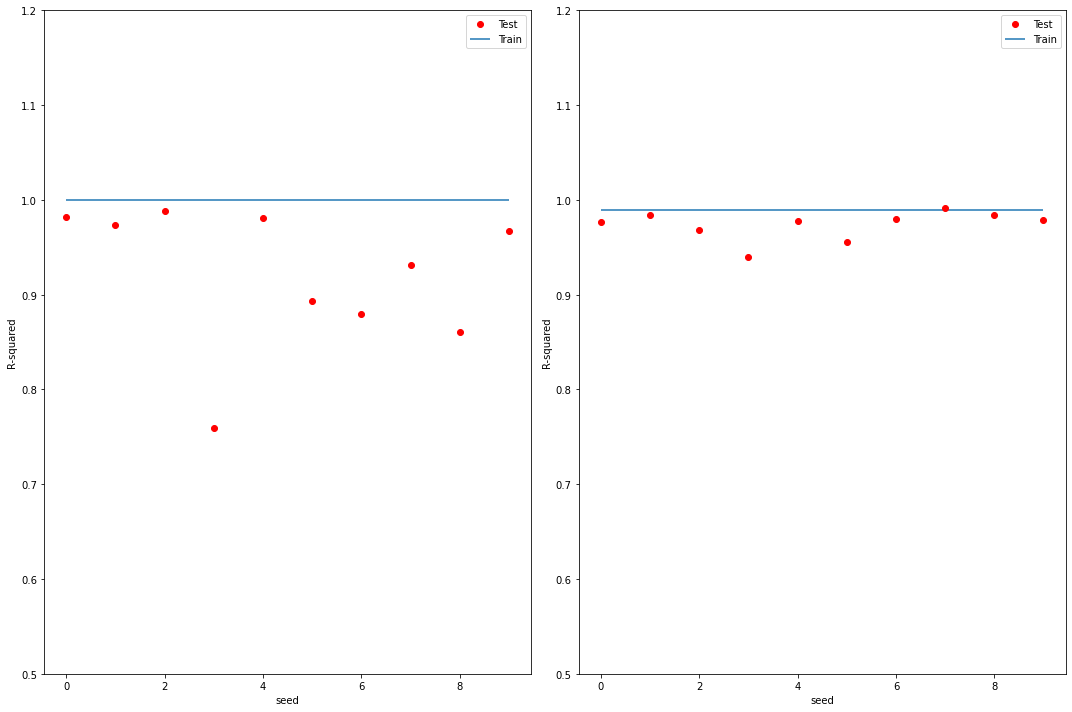

In [36]:
#다중공선성 제거 전
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(test1, 'ro', label="Test")
plt.hlines(result1.rsquared, 0, 9, label="Train")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)
#다중공선성 제거 후
plt.subplot(122)
plt.plot(test2, 'ro', label="Test")
plt.hlines(result2.rsquared, 0, 9, label="Train")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)
plt.tight_layout()
plt.show()

In [38]:
from sklearn.datasets import load_boston
import numpy as np
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
from patsy import dmatrix
formula = "scale(CRIM) + scale(I(CRIM ** 2)) + " + \
"scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + " + \
"scale(NOX) + scale(RM) + scale(AGE) + " + \
"scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
"scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])


In [39]:
dfX.corr()

,Intercept,scale(CRIM),scale(I(CRIM ** 2)),scale(ZN),scale(I(ZN ** 2)),scale(INDUS),scale(NOX),scale(RM),scale(AGE),scale(np.log(DIS)),scale(RAD),scale(TAX),scale(np.log(PTRATIO)),scale(B),scale(np.log(LSTAT)),CHAS
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scale(CRIM),NaN,1.000000,0.871061,-0.200469,-0.152919,0.406583,0.420972,-0.219247,0.352734,-0.464239,0.625505,0.582764,0.280251,-0.385064,0.395543,-0.055892
scale(I(CRIM ** 2)),NaN,0.871061,1.000000,-0.082634,-0.062511,0.172073,0.174481,-0.086407,0.158977,-0.224621,0.279830,0.258144,0.131323,-0.191856,0.181699,-0.041163
scale(ZN),NaN,-0.200469,-0.082634,1.000000,0.951970,-0.533828,-0.516604,0.311991,-0.569537,0.590655,-0.311948,-0.314563,-0.390312,0.175520,-0.477706,-0.042697
scale(I(ZN ** 2)),NaN,-0.152919,-0.062511,0.951970,1.000000,-0.436453,-0.433310,0.267548,-0.491017,0.496834,-0.252418,-0.235141,-0.316083,0.132351,-0.416080,-0.040274
scale(INDUS),NaN,0.406583,0.172073,-0.533828,-0.436453,1.000000,0.763651,-0.391676,0.644779,-0.761286,0.595129,0.720760,0.366747,-0.356977,0.597429,0.062938
scale(NOX),NaN,0.420972,0.174481,-0.516604,-0.433310,0.763651,1.000000,-0.302188,0.731470,-0.831977,0.611441,0.668023,0.162044,-0.380051,0.577072,0.091203
scale(RM),NaN,-0.219247,-0.086407,0.311991,0.267548,-0.391676,-0.302188,1.000000,-0.240265,0.256584,-0.209847,-0.292048,-0.356109,0.128069,-0.664528,0.091251
scale(AGE),NaN,0.352734,0.158977,-0.569537,-0.491017,0.644779,0.731470,-0.240265,1.000000,-0.778243,0.456022,0.506456,0.237448,-0.273534,0.606806,0.086518
scale(np.log(DIS)),NaN,-0.464239,-0.224621,0.590655,0.496834,-0.761286,-0.831977,0.256584,-0.778243,1.000000,-0.560335,-0.619008,-0.215174,0.324841,-0.524343,-0.087037


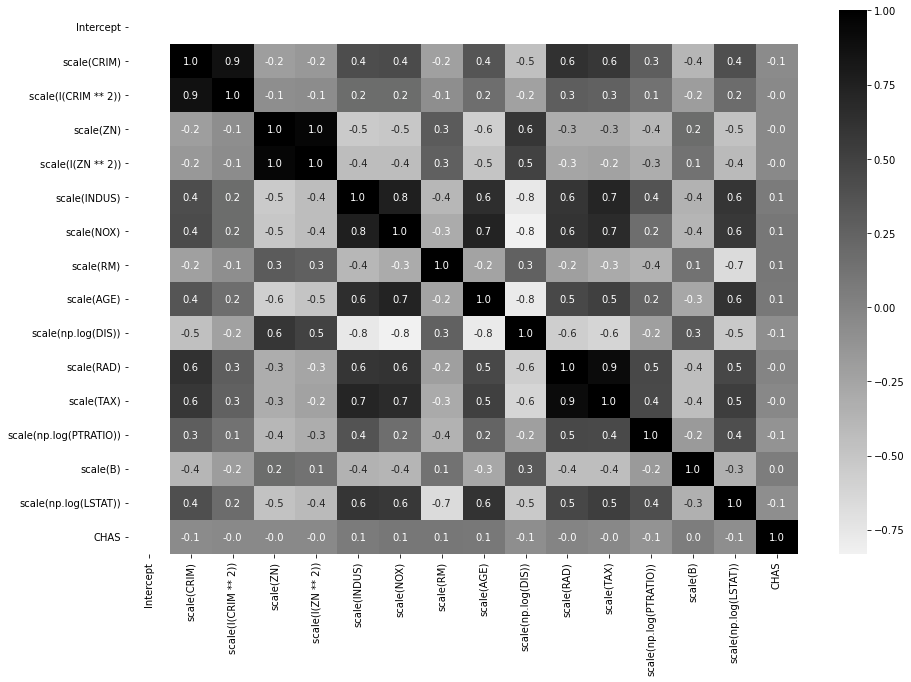

In [40]:
plt.figure(figsize=(15,10))
cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

In [42]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.079395,CHAS
1,1.080210,Intercept
2,1.387924,scale(B)
3,1.906591,scale(np.log(PTRATIO))
4,2.156423,scale(RM)
5,3.364921,scale(AGE)
6,3.373444,scale(np.log(LSTAT))
7,4.087754,scale(INDUS)
8,4.845394,scale(NOX)
9,5.427154,scale(np.log(DIS))


In [43]:
#VIF가 높은 값들을 제거하기 전의 모형
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 23 May 2022   Prob (F-statistic):          6.88e-170
Time:                        10:41:56   Log-Likelihood:                 165.33
No. Observations:                 506   AIC:                            -298.7
Df Residuals:                     490   BIC:                            -231.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [44]:
#VIF가 높은 변수들을 제거하고 최종적으로 선택한 독립변수들로 만든 모형
cols = ["Intercept", "CHAS", "scale(B)", "scale(CRIM)", "scale(AGE)",
"scale(np.log(PTRATIO))", "scale(RM)", "scale(np.log(LSTAT))"]
model_boston2 = sm.OLS(np.log(dfy), dfX[cols])
result_boston2 = model_boston2.fit()
print(result_boston2.summary())
# 결정계수 : 81.7% => 77.4% 
# 조건수 : 13.7 => 6.71

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     243.1
Date:                Mon, 23 May 2022   Prob (F-statistic):          3.61e-156
Time:                        10:42:55   Log-Likelihood:                 111.04
No. Observations:                 506   AIC:                            -206.1
Df Residuals:                     498   BIC:                            -172.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [45]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)